In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
df1 = pd.read_csv('/Users/ericchiyembekeza/Desktop/Lambda School/BW-1/properties_2016.csv')
df2 = pd.read_csv('/Users/ericchiyembekeza/Desktop/Lambda School/BW-1/properties_2017.csv')
#train1 = pd.read_csv('/Users/ericchiyembekeza/Desktop/Lambda School/BW-1/train_2016_v2.csv')
#train2 = pd.read_csv('/Users/ericchiyembekeza/Desktop/Lambda School/BW-1/train_2017.csv')

/Users/ericchiyembekeza/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ericchiyembekeza/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.concat([df1,df2], ignore_index=True)
#df_train = pd.concat([train1,train2], ignore_index=True)

In [ ]:
df.columns

In [5]:
features = ['basementsqft','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','storytypeid', 'poolcnt', 'taxvaluedollarcnt']

In [6]:
df = df[['basementsqft','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','storytypeid', 'poolcnt','taxvaluedollarcnt']]

In [ ]:
df.describe()

In [7]:
for i in features:
    df[i] = df[i].fillna((df[i].mean()))

In [ ]:
df.columns

In [ ]:
# df = df.fillna(method='ffill')
# df = df.fillna(method='backfill')

In [ ]:
df.shape

In [ ]:
df.describe()

In [8]:
X = df
y = X['taxvaluedollarcnt']

In [ ]:
X.columns

In [ ]:
X.head()

In [ ]:
y = X['taxvaluedollarcnt']

In [ ]:
X.columns

In [ ]:
X

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X.columns

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
X.columns

In [ ]:
X_train.shape

In [ ]:
X_train.columns

In [ ]:
X_val.shape

In [ ]:
y_train.shape

In [ ]:
y_val.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
X.describe()

In [11]:
!pip install category_encoders

You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#y_test = test['taxvaluedollarcnt']
y_pred = [train['taxvaluedollarcnt'].mean()]*len(y_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

In [12]:
import category_encoders as ce
from xgboost import XGBRegressor

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

#trainval = X_train
#trainval_id = trainval['id'].unique()
#train_id, val_id = train_test_split(trainval_id, random_state=42)
#train = trainval[trainval.id.isin(train_id)]
target = 'taxvaluedollarcnt'
#X_train = X_train.drop(columns=target)
#X_val = X_val.drop(columns=target)
#X_test = X_test.drop(columns=target)
#y_test = y_test[target]
#y_train = y_train[target]
#y_val = y_val[target]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
y_val_log = np.log1p(y_val)

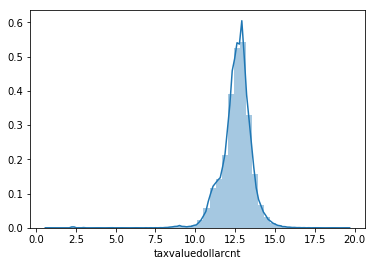

In [14]:
import seaborn as sns
%matplotlib inline
sns.distplot(y_train_log);

In [15]:
!pip install category_encoders

You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import category_encoders as ce
from xgboost import XGBRegressor

encoder = ce.OrdinalEncoder()
xtre = encoder.fit_transform(X_train)
xve = encoder.transform(X_val)

X_test = encoder.transform(X_test)


eval_set = [(xtre, y_train_log), (xve, y_val_log)]

model = XGBRegressor(n_estimators=100, n_jobs=-1, max_depth=8, max_delta_step=1)
model.fit(xtre, y_train_log, eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

/Users/ericchiyembekeza/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:34:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:12.014	validation_1-rmse:12.0146
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:11.9135	validation_1-rmse:11.9161
[2]	validation_0-rmse:11.8137	validation_1-rmse:11.817
[3]	validation_0-rmse:11.7122	validation_1-rmse:11.7151
[4]	validation_0-rmse:11.6041	validation_1-rmse:11.6165
[5]	validation_0-rmse:11.5065	validation_1-rmse:11.5178
[6]	validation_0-rmse:11.4106	validation_1-rmse:11.4168
[7]	validation_0-rmse:11.3163	validation_1-rmse:11.317
[8]	validation_0-rmse:11.2193	validation_1-rmse:11.2187
[9]	validation_0-rmse:11.1243	validation_1-rmse:11.1176
[10]	validation_0-rmse:11.0293	validation_1-rmse:11.0178
[11]	validation_0-rmse:10.9329	validation_1-rmse:10.9193
[12]	validation_0-rmse:10.8338	validation_1-rmse:10.81

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=1,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [17]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

y_pred_log = model.predict(xve)
print('Validation score', rmse(y_val_log, y_pred_log))
y_pred_log = model.predict(X_test)
print('Test score', rmse(y_test_log, y_pred_log))

Validation score 2.2662239722643815
Test score 2.268304454594174


In [ ]:
import matplotlib.pyplot as plt
# Get feature importances
importances = pd.Series(model.feature_importances_, xtre.columns)

# Plot feature importances
n = len(xtre.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

In [ ]:
!pip install eli5

In [ ]:
#Permutation Importances plot
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error',
                                 cv='prefit', n_iter=4, random_state=42)

permuter.fit(xve, y_val_log)
feature_names = xve.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

In [ ]:
!pip install pdpbox

In [ ]:
'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'decktypeid', 'storytypeid', 'poolcnt',
       'garagecarcnt'
#Partial Dependency Plot, 1 feature isolation
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'speed'

isolated = pdp_isolate(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ram'

isolated = pdp_isolate(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'hd'

isolated = pdp_isolate(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'premium'

isolated = pdp_isolate(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
#Partial Dependency Plot, 2 feature interaction
from pdpbox.pdp import pdp_interact, pdp_interact_plot

#features = ['speed', 'ram']

interaction = pdp_interact(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [ ]:
#features = ['premium', 'ram']

interaction = pdp_interact(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);